In [32]:
import pandas as pd
%matplotlib inline

Load historical data of ML predictions vs competing forecasters' predictions vs actual recorded values

In [33]:
dbp = pd.read_csv('/Users/Alex/Coding/weather_db/Data/prediction_db_analysis.csv')

Compute rows of prediction errors for ML model (ML), The Weather Network (TWN), and Environment Canada (EC). We aren't taking the absoulte values of the errors here because we're interested in seeing if there's a bias (i.e. a systematic offset in prediction error) for any of the forecasters.

In [34]:
dbp['ML_err'] = dbp.predictions - dbp.high
dbp['TWN_err'] = dbp.TWN_high_T1 - dbp.high
dbp['EC_err'] = dbp.EC_high_T1 - dbp.high

In [35]:
dbp[['ML_err', 'TWN_err', 'EC_err']].describe()

,ML_err,TWN_err,EC_err
count,15838.000000,15838.000000,15838.000000
mean,-0.096904,-1.405297,-1.280660
std,2.539094,2.505230,3.082596
min,-31.597757,-31.000000,-33.000000
25%,-1.503010,-2.700000,-2.800000
50%,-0.054012,-1.200000,-1.100000
75%,1.361364,0.000000,0.300000
max,16.483165,19.900000,24.600000


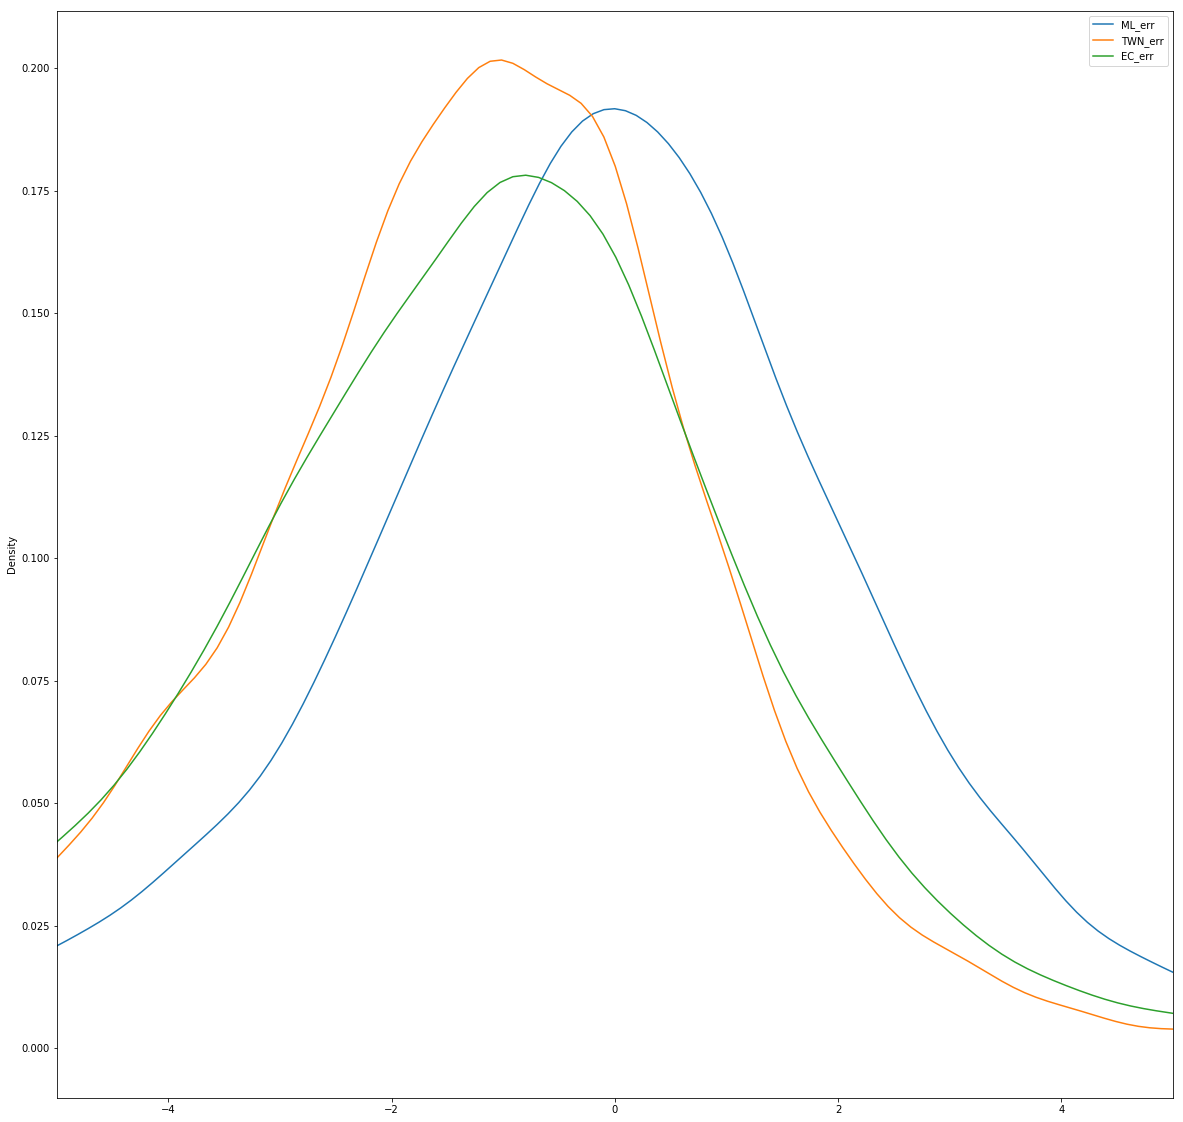

In [36]:
dbp.plot(y=['ML_err', 'TWN_err', 'EC_err'], kind='kde', figsize=(20,20), xlim=(-5,5))

The summary statistics and kernel density estimation plot shown above demonstrate that our 2 competing forecasters have a bias in their prediction errors, whereas our ML model does not (relatively speaking). See README `Update` section for more details under `Feb 2, 2019`.